# Supervised Learning Lab
### Jawadul (Salvin Chowdhury)
In this lab you will be experimenting with several supervised learning methods.  Let's start by importing a few things.  

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

We first generate some dummy data from random samples in a 2D space from 4 clusters.


In [2]:
n_samples = 64  # the total number of data points being generated
variance = 0.1  # the spread of each cluster

# 4 clusters in a 2D space
# these clusters are equally spaced in a square pattern
centers = np.array([[0, 0],
                    [0, 1],
                    [1, 0],
                    [1, 1]])

# X is an array that contains generated 2D coordinates of each sample, with each row representing a sample point [x, y]
# y is an array that contains labels for each sample, to identify which cluster the point belongs to
X, y = make_blobs(n_samples,                         # n_samples specifies the total number of samples for generation
                  centers=centers,                   # centers are used to generate clusters around these points
                  cluster_std = np.sqrt(variance),   # setting the standard deviation of each cluster
                  shuffle=True)                      # randomly shuffles the samples after generation to ensure they aren't ordered by cluster

We now define a function to create and train a kNN classifier.  Calling this function will generate some print statements that show the confusion matrix output.  

In [3]:

# X_trian and y_train is the training data and its corresponding labels, which is used to "learn" the patterns
# X_test and y_test is the test data and their true labels, which is used to evaluate its performance by comparing 
# predicted labels against known labels
# k=5 is the number of nearest neighbors the KNN algorithm considers when classifying each point 

def run_knn(X_train, y_train, X_test, y_test, k=5):

    # initializes a KNN classifier with k neighbors, where k=5
    knn = KNeighborsClassifier(n_neighbors=k)

    # this is a fit method that trains the KNN model using training data and labels
    knn.fit(X_train, y_train)

    # knn.score() calculates the accuracy of the KNN model on the training set 
    # the accuracy is the percentage of correct predictions out of total predictions 
    print('Accuracy of K-NN classifier on training set: {:.2f}'
         .format(knn.score(X_train, y_train)))
    print('Accuracy of K-NN classifier on test set: {:.2f}'
         .format(knn.score(X_test, y_test)))

    # generates predictions for each point in the test set by comparing them to the training set using KNN
    pred = knn.predict(X_test)

    # prints a table summarizing the performance of the classification model
    print(confusion_matrix(y_test, pred))

## Exercise 1:
Use matplot lib to plot the groups of the ``X`` values coloring the points according to their labels (``y``).  Then add two lines to the plot that show your approximation of where linear decision boundaries might lie to optimally separate the classes.

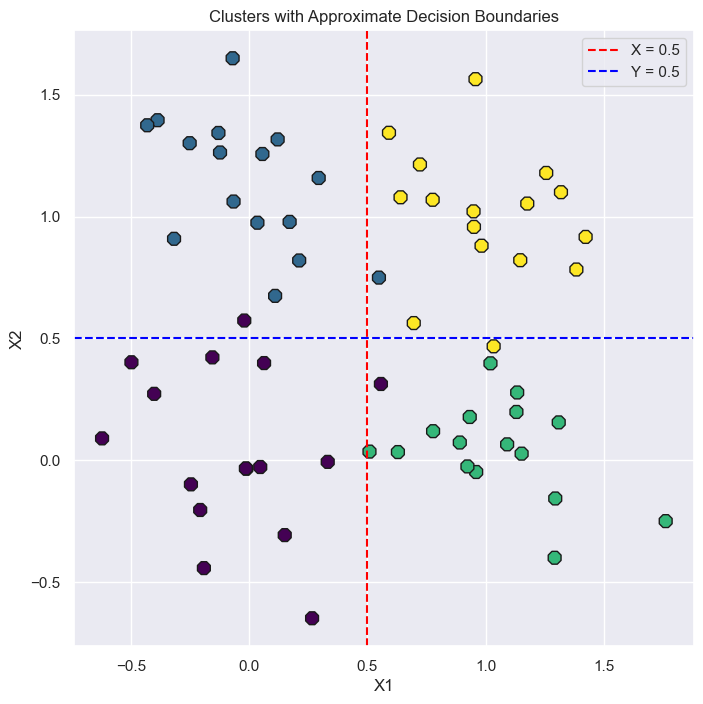

In [4]:
# sets plot size to the 8x6 inches, making it easy to see the clusters and boundaries
plt.figure(figsize=(8,8))

# displays each point using the first & second columns of X | c=y colors each point based on cluster label
# cmap="viridis" sets a color map, which produces distinct colors | marker decides the shape of the plots
# edgecolor="k" adds a black outline around each shape | s=100 sets the size of the shape
plt.scatter(X[:,0], X[:,1], c=y, cmap="viridis", marker="8", edgecolor="k", s=100)

# sets the label of the x and y axes of the plots
plt.xlabel("X1")
plt.ylabel("X2")

# adds a vertical dotted red line at x1 = 0.5, which acts as a boundary to divide the clusters along the x and y axis
plt.axvline(x=0.5, color='red', linestyle='dashed', label='X = 0.5')  
plt.axhline(y=0.5, color='blue', linestyle='dashed', label='Y = 0.5')  

# adds a legend explaining the boundary lines
plt.legend()

# adss a title to the plot and displays the plot
plt.title("Clusters with Approximate Decision Boundaries")
plt.show()

Next, lets see how well this data can be classified with kNN

In [5]:
# train_test_split is a function used to split the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) # X and y are the data and respective labels
                                                                          # X_train and y_train is used for training the KNN model
                                                                          # X_test and y_test is used for testing the model's performance
                                                                          # random_state=0 ensures that the split is reproducible

# calls the method explained in previous cells
run_knn(X_train, y_train, X_test, y_test, 5)

Accuracy of K-NN classifier on training set: 0.92
Accuracy of K-NN classifier on test set: 1.00
[[4 0 0 0]
 [0 5 0 0]
 [0 0 3 0]
 [0 0 0 4]]


## Exercise 2:
Experiment in the next cell with adjusting the variance when building additional random datasets.  Write a few statements in your reflection below about how the variance affected the accuracy and whether overfitting occured.  

In [6]:
variances = [0.1, 0.2, 0.3, 0.5, 0.6] # list of variances in increasing size
n_samples = 64 # the number of samples

# 4 clusters in a 2D space
# these clusters are equally spaced in a square pattern
centers = np.array([[0, 0],
                    [0, 1],
                    [1, 0],
                    [1, 1]])

# for looping through the list of variances
for variance in variances:
    
    #printing the variance
    print(f"\nVariance: {variance}")

    # generating a dataset
    # X is an array that contains generated 2D coordinates of each sample, with each row representing a sample point [x, y]
    # y is an array that contains labels for each sample, to identify which cluster the point belongs to
    X, y = make_blobs(n_samples,                         # n_samples specifies the total number of samples for generation
                      centers=centers,                   # centers are used to generate clusters around these points
                      cluster_std = np.sqrt(variance),   # setting the standard deviation of each cluster
                      shuffle=True)                      # randomly shuffles the samples after generation to ensure they aren't ordered by cluster

    # train_test_split is a function used to split the dataset into a training set and a test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) # X and y are the data and respective labels
                                                                              # X_train and y_train is used for training the KNN model
                                                                              # X_test and y_test is used for testing the model's performance
                                                                              # random_state=0 ensures that the split is reproducible
    
    # calls the method explained in previous cells
    run_knn(X_train, y_train, X_test, y_test, 5)


Variance: 0.1
Accuracy of K-NN classifier on training set: 0.96
Accuracy of K-NN classifier on test set: 0.88
[[3 0 0 0]
 [0 3 0 0]
 [0 0 4 0]
 [0 0 2 4]]

Variance: 0.2
Accuracy of K-NN classifier on training set: 0.83
Accuracy of K-NN classifier on test set: 0.75
[[3 0 1 0]
 [0 1 0 0]
 [2 0 5 1]
 [0 0 0 3]]

Variance: 0.3
Accuracy of K-NN classifier on training set: 0.79
Accuracy of K-NN classifier on test set: 0.38
[[2 0 1 1]
 [1 1 0 0]
 [2 0 2 1]
 [2 1 1 1]]

Variance: 0.5
Accuracy of K-NN classifier on training set: 0.73
Accuracy of K-NN classifier on test set: 0.38
[[1 1 1 0]
 [2 2 0 0]
 [2 1 2 0]
 [1 2 0 1]]

Variance: 0.6
Accuracy of K-NN classifier on training set: 0.73
Accuracy of K-NN classifier on test set: 0.69
[[6 1 0 0]
 [0 2 0 1]
 [0 0 2 1]
 [0 1 1 1]]


### Reflection
Overfitting occurs when the model shows a very high accuracy on the training data, but very low accuracy on the test data. This is what makes a strong indication of overfitting. A large gap of 0.15 or more indicates overfitting. 

As the variance increases, we can see the accuracy levels of the the training set and test set decrease. However, we can see that when the variance is 0.6, overfitting occurs, as there is a large difference between the accuracies of the training and test set.

Next, we import some data.  

## Exercise 3:
Read through the website: https://www.kaggle.com/fedesoriano/stroke-prediction-dataset where the following dataset was obtained.  Create a feature description below.

In [7]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [8]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


### Feature Description
This is a datset that is used to preict whether a patient is likely to get a stroke based on the input parameters like gender, age, diseases, and smoking status. 

Here, we can see that there are a number of features, which are describes as follows:
- **id:** this is a unique identifier for each patient whose data has been collected in a tabular form
- **gender:** this is to identify what gender the patient has identified themselves as
- **hyptertension, heart disease:** here, we use binary values to determine if the patient has a history of hypertension or heart disease
- **ever_married:** uses boolean values to determine whether the patient is married or not
- **work_type, residence_type:** this is to determine the type of work and residence the patient has
- **avg_glucose_level, bmi:** used to determine the levels of glucose and bmi of the patient
- **smoking_status:** used to determine if the patient has smoked or not
- **stroke:** used to determine if the patient has suffered from a stroke or not

## Exercise 4:
Extract the age and hypertension columns as input features and stroke as output labels from the dataframe.  Scale and split the data and then run the knn training and evaluation.  

Fill out the Reflection cell below describing what you observe.  Make sure you identify if overfitting is occuring.  

In [9]:
X = df[['age', 'hypertension']]  # extracting the age and hypertension columns as input features
y = df['stroke']                 # extracting stroke as the output labels from the dataframe

# scaling the features using min-max
X_scaled = (X - X.min()) / (X.max() - X.min())

# splitting the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=0)


# calling the KNN function
run_knn(X_train, y_train, X_test, y_test, 5)

Accuracy of K-NN classifier on training set: 0.95
Accuracy of K-NN classifier on test set: 0.95
[[1211    2]
 [  64    1]]


### Reflection
Here, we can see that the accuracy of the training and test set are equal, which means no overfitting has occurred. As per the confusion matrix, here are the few takeaways:
- 1211 is the number of cases that were predicted as non-stroke
- the model had incorrectly predicted 2 cases as stroke when they were actually non-stroke
- 64 is the numer of cases that the model predicted incorrectly as non-stroke when they were actually stroke cases
- 1 is the true positive, where the model correctly predicted 1 case as a stroke

With one true positive and 64 false negatives, this indicates that the model struggles to accuractely indentify stroke cases, likely due to the imbalance. 

## Exercise 5:
There are a few things going on here.  First, we have a significant class imbalance problem.  Write a 1-liner to calculate the ratio of stroke to non stroke patients in the dataset.

In [10]:
# used to calculate the ratio of strokes to non strokes
calculate_ratio = df['stroke'].value_counts(normalize=True)
print(calculate_ratio)

stroke
0    0.951272
1    0.048728
Name: proportion, dtype: float64


OK, so that is a really imbalanced class.  To help resolve this, we are going to experiment with random oversampling and undersampling in our training dataset.  

## Exercise 6:
Figure out which class has fewer and how many samples exist for that class.  Use the ``sample()`` method to undersample the data: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html  Join the results back into a single dataframe that represents the undersampled data (appropriately named).

Confirm the number of samples in each class using ``value_counts()``.

In [11]:
# the number of count of each class
class_counts = df['stroke'].value_counts()
minority_class_count = class_counts.min()

# separating the majority and minority classes
df_minority = df[df['stroke'] == 1]
df_majority = df[df['stroke'] == 0]

# undersample the majority class to match the minority class count
df_majority_undersampled = df_majority.sample(n=minority_class_count, random_state=0)

# combine undersampled majority class with the minority class to create a balanced dataset
df_undersampled = pd.concat([df_minority, df_majority_undersampled], axis=0)

# confirm the number of samples in each class
print(df_undersampled['stroke'].value_counts())

stroke
1    249
0    249
Name: count, dtype: int64


### Code Explained
- We use `value_counts()` to find the number of samples in each class. The minority class count is used as the samepl size for undersampling
- The data is then split into the majority (`stroke = 0`) and minority (`stroke = 1`) classes
- We use `sample()` where we randomly select a subset of the majority class with the same ount as the minority class
- A balanced dataset is created by joining the minority class with the undersampled majority class
- We use `value_counts()` confirms the new balanced class distribution

### How the Code Works
1. We use `class_counts` to count the ocurrences of each class in the `stroke` column of the DataFrame. We make an attempt to understand to understand how many samples belong to each class (stroke vs non-stroke) is essential for identifying class imbalance.

2. We count the number of fewer samples using the `min()` function. We need the count of the minority class to determine how many samples we should take from the majority class to achieve balance.

3. Next, we create two separate DataFrames for the stroke cases where `stroke = 0` and `stroke = 1`. By separating the classes, we can manipulate each of the classes independently.

4. We use `.sample()` to select a subset of the majority class to create a DataFrame, which contains the same numebr of samples as the minority class. Undersampling helps the balance the dataset by reducing the majority class size.

5. We use `.concat()` where we concatenate the undersampled majority class and the minority class into a single DataFrame. This DataFrame now contains a balance representation of both classes

## Exercise 7:
Next, re-run the kNN training and determine the updated accuracy and confusion matrix.  Write a few statements below for your reflection on the results.  Make sure you answer the question, did overfitting occur?

In [12]:
# split the undersampled dataset into features and labels
X = df_undersampled[['age', 'hypertension']]
y = df_undersampled['stroke']

# splitting the data into trianing and testing data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# run KNN training evaluation
run_knn(X_train, y_train, X_test, y_test, k=5)

Accuracy of K-NN classifier on training set: 0.81
Accuracy of K-NN classifier on test set: 0.78
[[51 12]
 [15 47]]


### Reflection
By looking at the accuracies of the training and test data set, we can see that the accuracies are very close, hence this means that there is no overfitting, and that the model is generalizing well to unseen data.

Looking at the confusion matrix, this is what the data means:
- 51 non stroke cases classified were correctly classified as non-stroke cases
- 12 non-stroke classes were incorrectly classified as stroke cases
- 15 stroke cases incorrectly classified as non-stroke
- 47 stroke cases were correctly classified as stroke classes

## Exercise 8:
Next, you should oversample the data and store the results in an appropriately-named dataframe.  Again, you should use ``sample()``.

In [13]:
# the number of counts for each class
class_counts = df['stroke'].value_counts()
majority_class_count = class_counts.max()

# to separate the majority and minority classes
df_minority = df[df['stroke'] == 1]
df_majority = df[df['stroke'] == 0]

# oversampling the minority class to match the count of the majority class count
df_minority_oversampled = df_minority.sample(n=majority_class_count, replace=True, random_state=0)

# combining the oversampled minority class with the majority class to create a balanced dataset
df_oversampled = pd.concat([df_majority, df_minority_oversampled])

# confirming the number of samples in each class
print(df_oversampled['stroke'].value_counts())

stroke
0    4861
1    4861
Name: count, dtype: int64


## Exercise 9:
Next, re-run the kNN training and determine the updated accuracy and confusion matrix.  Write a few statements below for your reflection on the results.  Make sure you answer the question, did overfitting occur?

In [14]:
# split the undersampled dataset into features and labels
X = df_oversampled[['age', 'hypertension']]
y = df_oversampled['stroke']

# splitting the data into trianing and testing data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# run KNN training evaluation
run_knn(X_train, y_train, X_test, y_test, k=5)

Accuracy of K-NN classifier on training set: 0.80
Accuracy of K-NN classifier on test set: 0.79
[[ 865  358]
 [ 153 1055]]


### Reflection:
Here, we can see than the accuracies of the training set and test set are very close, hence this suggests that there isn't much overfitting.

Here is a deeper look into the confusion matrix:
- 865 is the number of true negatives that were correctly predicted as non-stroke cases
- 358 is the number of false positives that were incorrectly predicted non-stroke cases as stroke cases
- 153 is the number of false negatives that were incorrectly predicted stroke cases as non-stroke
- 1055 is the number of true positives that were correctly predicted as stroke cases

## Exercise 10:
Next, you should try at least two other combinations of features to see what affects they have on accuracy.  At least one of your experiments should include categorical variables that have been converted to numerical.  You should also experiment with at least 2 additional values of k.  In total, you should run at least 5 experiments, and you should document the results in a table below in the reflection section.  

In [15]:
# creating a results array
results = []

# combinations of features and values of k
feature_combinations = [
    (['age', 'hypertension', 'heart_disease'], [4, 5]),
    (['age', 'hypertension', 'work_type_Private'], [4, 5]),
    (['age', 'hypertension', 'work_type_Self-employed'], [4, 5]),
    (['age', 'hypertension', 'bmi'], [5, 7]),
    (['age', 'hypertension', 'smoking_status_smokes'], [5, 7])
]

# looping through the feature combinations array
for features, k_values in feature_combinations:
    
    # encoding categorical values
    df_encoded = pd.get_dummies(df, columns=['work_type', 'gender', 'smoking_status'], drop_first=True)
    df_encoded = df_encoded.dropna()

    # extracting features and labels
    X = df_encoded[features]
    y = df_encoded['stroke']

    # splitting the data into training and test datasets
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

    # for looping the combinations of features and values of k
    for k in k_values:
        run_knn(X_train, y_train, X_test, y_test, k)

        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        train_accuracy = knn.score(X_train, y_train)
        test_accuracy = knn.score(X_test, y_test)
        pred = knn.predict(X_test)
        cm = confusion_matrix(y_test, pred)


        # storing the results in a data frame
        results.append({
            'Features': ', '.join(features),
            'k': k,
            'Train Accuracy': train_accuracy,
            'Test Accuracy': test_accuracy,
            'Confusion Matrix': cm.tolist()
        })

results_df = pd.DataFrame(results)
# markdown = results_df.to_markdown(index=False)
# print(markdown)

Accuracy of K-NN classifier on training set: 0.96
Accuracy of K-NN classifier on test set: 0.96
[[1179    0]
 [  49    0]]
Accuracy of K-NN classifier on training set: 0.95
Accuracy of K-NN classifier on test set: 0.95
[[1171    8]
 [  48    1]]
Accuracy of K-NN classifier on training set: 0.96
Accuracy of K-NN classifier on test set: 0.96
[[1175    4]
 [  49    0]]
Accuracy of K-NN classifier on training set: 0.96
Accuracy of K-NN classifier on test set: 0.96
[[1175    4]
 [  49    0]]
Accuracy of K-NN classifier on training set: 0.96
Accuracy of K-NN classifier on test set: 0.96
[[1175    4]
 [  48    1]]
Accuracy of K-NN classifier on training set: 0.96
Accuracy of K-NN classifier on test set: 0.96
[[1175    4]
 [  48    1]]
Accuracy of K-NN classifier on training set: 0.96
Accuracy of K-NN classifier on test set: 0.96
[[1176    3]
 [  49    0]]
Accuracy of K-NN classifier on training set: 0.96
Accuracy of K-NN classifier on test set: 0.96
[[1177    2]
 [  49    0]]
Accuracy of K-NN

### Final Results
| Features                                   |   k |   Train Accuracy |   Test Accuracy | Confusion Matrix     |
|:-------------------------------------------|----:|-----------------:|----------------:|:---------------------|
| age, hypertension, heart_disease           |   4 |         0.956534 |        0.960098 | [[1179, 0], [49, 0]] |
| age, hypertension, heart_disease           |   5 |         0.953817 |        0.954397 | [[1171, 8], [48, 1]] |
| age, hypertension, work_type_Private       |   4 |         0.955175 |        0.95684  | [[1175, 4], [49, 0]] |
| age, hypertension, work_type_Private       |   5 |         0.955175 |        0.95684  | [[1175, 4], [49, 0]] |
| age, hypertension, work_type_Self-employed |   4 |         0.955175 |        0.957655 | [[1175, 4], [48, 1]] |
| age, hypertension, work_type_Self-employed |   5 |         0.955175 |        0.957655 | [[1175, 4], [48, 1]] |
| age, hypertension, bmi                     |   5 |         0.958164 |        0.957655 | [[1176, 3], [49, 0]] |
| age, hypertension, bmi                     |   7 |         0.957077 |        0.958469 | [[1177, 2], [49, 0]] |
| age, hypertension, smoking_status_smokes   |   5 |         0.956262 |        0.960098 | [[1179, 0], [49, 0]] |
| age, hypertension, smoking_status_smokes   |   7 |         0.953002 |        0.954397 | [[1171, 8], [48, 1]] |

## Exercise 11:
Next, you should experiment with a couple of different distance metrics.  To change the metric, you should add a parameter (with an appropriate default) to the run_knn function and use the parameter to set the metric like this: ``KNeighborsClassifier(n_neighbors=2, metric=metric)``.  Metric options can be seen here: https://scikit-learn.org/0.24/modules/generated/sklearn.neighbors.DistanceMetric.html#sklearn.neighbors.DistanceMetric

Try at least 3 different metrics with the "best" accuracy configuration.  Document the results in a table in the reflection section below.  Please also record any observations about using different metrics.  

In [16]:
def run_knn(X_train, y_train, X_test, y_test, k=5, metric='euclidean'):

    # initializing the KNN classifier and the specific distance metric
    knn = KNeighborsClassifier(n_neighbors=k, metric=metric)

    # fitting the model using th training data and labels
    knn.fit(X_train, y_train)

    # knn.score() calculates the accuracy of the KNN model on the training set 
    # the accuracy is the percentage of correct predictions out of total predictions 
    print('Accuracy of K-NN classifier on training set: {:.2f}'
         .format(knn.score(X_train, y_train)))
    print('Accuracy of K-NN classifier on test set: {:.2f}'
         .format(knn.score(X_test, y_test)))

    # generating predictions for the test set
    pred = knn.predict(X_test)

    # printing a confusion matrix to summarize performance of the model
    print("Confusion Matrix: ")
    print(confusion_matrix(y_test, pred))

    return knn

In [20]:
# split the undersampled dataset into features and labels
X = df_undersampled[['age', 'hypertension']]
y = df_undersampled['stroke']

# splitting the data into trianing and testing data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Example k value and different metrics
k_value = 4
metrics = ['euclidean', 'manhattan', 'chebyshev']

# Run K-NN for different metrics
for metric in metrics:
    print(f"\nUsing metric: {metric}")
    run_knn(X_train, y_train, X_test, y_test, k_value, metric)


Using metric: euclidean
Accuracy of K-NN classifier on training set: 0.80
Accuracy of K-NN classifier on test set: 0.71
Confusion Matrix: 
[[56  7]
 [29 33]]

Using metric: manhattan
Accuracy of K-NN classifier on training set: 0.80
Accuracy of K-NN classifier on test set: 0.71
Confusion Matrix: 
[[56  7]
 [29 33]]

Using metric: chebyshev
Accuracy of K-NN classifier on training set: 0.79
Accuracy of K-NN classifier on test set: 0.74
Confusion Matrix: 
[[57  6]
 [26 36]]


### Reflection
With the undersampled data, it is shown that using the metric chebyshev is slightly better than other metrics, and this is because it yields a higher test accuracy and better classification between true positives and false negatives.